# Schrieffer-Wolff plot for paper

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
import scipy
from pysqkit.drives.pulse_shapes import gaussian_top
from typing import List, Dict, Callable
from scipy.optimize import minimize
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [2]:
with open('sw_data/jc.txt') as file_jc:
    jc = json.load(file_jc)
with open('sw_data/zz.txt') as file_zz:
    zz = json.load(file_zz)
with open('sw_data/transm_freq.txt') as file_freq:
    transm_freq = json.load(file_freq)
with open('sw_data/zz_sw.txt') as file_zz_sw:
    zz_sw = json.load(file_zz_sw)
with open('sw_data/mu_yz.txt') as file_cr_sw:
    mu_yz = json.load(file_cr_sw)
with open('sw_data/mu_yi.txt') as file_cr_sw:
    mu_yi = json.load(file_cr_sw)
with open('sw_data/mu_yz_sw.txt') as file_cr_sw:
    mu_yz_sw = json.load(file_cr_sw)
with open('sw_data/mu_yi_sw.txt') as file_cr_sw:
    mu_yi_sw = json.load(file_cr_sw)
with open('data_cr_transmon_fluxonium/data_cr_transmon_fluxonium_linear.txt') as file_res:
    result_sw_lin = json.load(file_res)

In [7]:
def plot_zz(
    jc: dict,
    transm_freq,
    zz,
    zz_sw,
    plot_setup={'fs': 20, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':18},
    save=False,
    dark=False
):
    if dark:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')
        
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    fig, ax = plt.subplots(figsize=(6, 6))
    colors_dict = {"0": 'yellow', '1': 'red', '2':'blue'}
    for key in jc.keys():       
        ax.semilogy(transm_freq, np.array(zz[key])*1e3, linewidth=plot_setup["lw"], 
                    color=colors_dict[key], label='$J_C/ 2 \\pi = {}  \, \\mathrm{{MHz}}$'.format(jc[key]*1e3))
        ax.semilogy(transm_freq, np.array(zz_sw[key])*1e3, linewidth=plot_setup["lw"], 
                    color=colors_dict[key], linestyle='--')
    ax.set_xlabel('$\\omega_T/2 \\pi \, (\\mathrm{GHz})$', fontsize=plot_setup["fs"])
    x_ticks = [4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8]
    x_ticks_latex = ['$4.2$', '$4.4$', '$4.6$', '$4.8$', '$5.0$', '$5.2$', '$5.4$', '$5.6$', '$5.8$']
    plt.xticks(x_ticks, x_ticks_latex)
    y_ticks = [0.1, 0.01]
    y_ticks_latex = ['$10^{-1}$', '$10^{-2}$']
    plt.yticks(y_ticks, y_ticks_latex)
    ax.set_ylabel('$\\xi_{ZZ}/2 \\pi \, (\\mathrm{MHz})$', fontsize=plot_setup['fs'])
    ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    plt.legend(loc='best', fontsize=plot_setup["fsl"], bbox_to_anchor=(0.72,0.5))
    if save:
        plt.savefig("zz_fig.svg")
    plt.show()

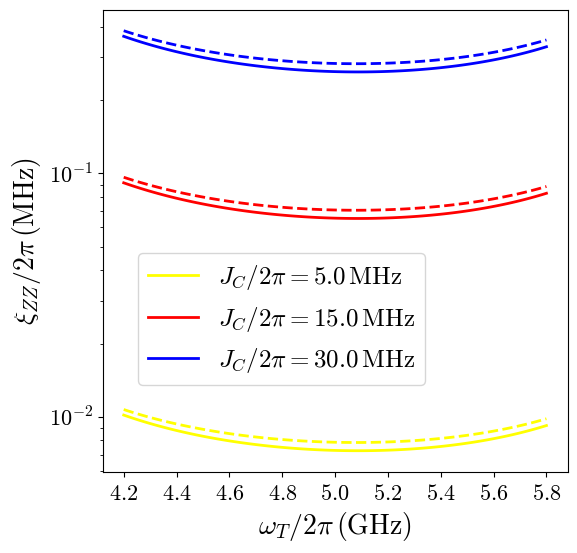

In [8]:
plot_zz(jc, transm_freq, zz, zz_sw, save=False, dark=False)

In [62]:
def plot_sw_comparison(
    jc: dict,
    transm_freq,
    zz,
    zz_sw,
    res_lin,
    plot_setup={'fs': 20, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    n_points = len(res_lin)
    eps = np.zeros(n_points)
    cr = np.zeros(n_points)
    cr_sw = np.zeros(n_points)
    for k in range(0, n_points):
        eps[k] = res_lin[k]["eps"]
        cr[k] = res_lin[k]["cr"]
        cr_sw[k] = res_lin[k]["cr_sw"]
    fig, ax = plt.subplots(2, figsize=(6,12))
    colors_dict = {"0": 'yellow', '1': 'red', '2':'blue'}
    colors_dict = {"0": 'lightblue', '1': 'blue', '2':'darkblue'}
    for key in jc.keys():       
        ax[0].semilogy(transm_freq, np.array(zz[key])*1e3, linewidth=plot_setup["lw"], 
                    color=colors_dict[key], label='$J_C/ 2 \\pi = {}  \, \\mathrm{{MHz}}$'.format(jc[key]*1e3))
        ax[0].semilogy(transm_freq, np.array(zz_sw[key])*1e3, linewidth=plot_setup["lw"], 
                    color=colors_dict[key], linestyle='--')
    ax[0].set_xlabel('$\\omega_t/2 \\pi \, (\\mathrm{GHz})$', fontsize=plot_setup["fs"])
    x_ticks = [4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8]
    x_ticks_latex = ['$4.2$', '$4.4$', '$4.6$', '$4.8$', '$5.0$', '$5.2$', '$5.4$', '$5.6$', '$5.8$']
    ax[0].set_xticks(x_ticks)
    ax[0].set_xticklabels(x_ticks_latex)
    y_ticks = [0.1, 0.01]
    y_ticks_latex = ['$10^{-1}$', '$10^{-2}$']
    ax[0].set_yticks(y_ticks)
    ax[0].set_yticklabels(y_ticks_latex)
    ax[0].set_ylabel('$\\xi_{ZZ}/2 \\pi \, (\\mathrm{MHz})$', fontsize=plot_setup['fs'])
    ax[0].tick_params(axis='both', labelsize=plot_setup["ls"])
    ax[0].legend(loc='best', fontsize=plot_setup["fsl"], bbox_to_anchor=(0.72,0.5))
    ax[1].plot(eps, np.abs(cr), color='black', linestyle='-', label='Numerical')
    ax[1].plot(eps, np.abs(cr_sw), color='black', linestyle='--', label='Schrieffer-Wolff')
    x_ticks = [0.00, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30]
    x_ticks_latex = ['$0$', '$50$', '$100$', '$150$', '$200$', '$250$', '$300$']
    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_ticks_latex)
    y_ticks = [0.0, 0.2, 0.4, 0.6, 0.8]
    y_ticks_latex = ['$0.0$', '$0.2$', '$0.4$', '$0.6$', '$0.8$']
    ax[1].set_yticks(y_ticks)
    ax[1].set_yticklabels(y_ticks_latex)
    ax[1].legend(loc='best', fontsize=plot_setup["fsl"])
    ax[1].set_xlabel('$\\varepsilon_{d, f}/h \, (\\mathrm{MHz})$', fontsize=plot_setup["fs"])
    ax[1].set_ylabel('$|\\mu_{\\mathrm{CR}}|/h \, (\\mathrm{MHz})$', fontsize=plot_setup["fs"])
    ax[1].tick_params(axis='both', labelsize=plot_setup["ls"])
   
    if save:
        plt.savefig("sw_flx_tramson_comparison.svg")
    plt.show()

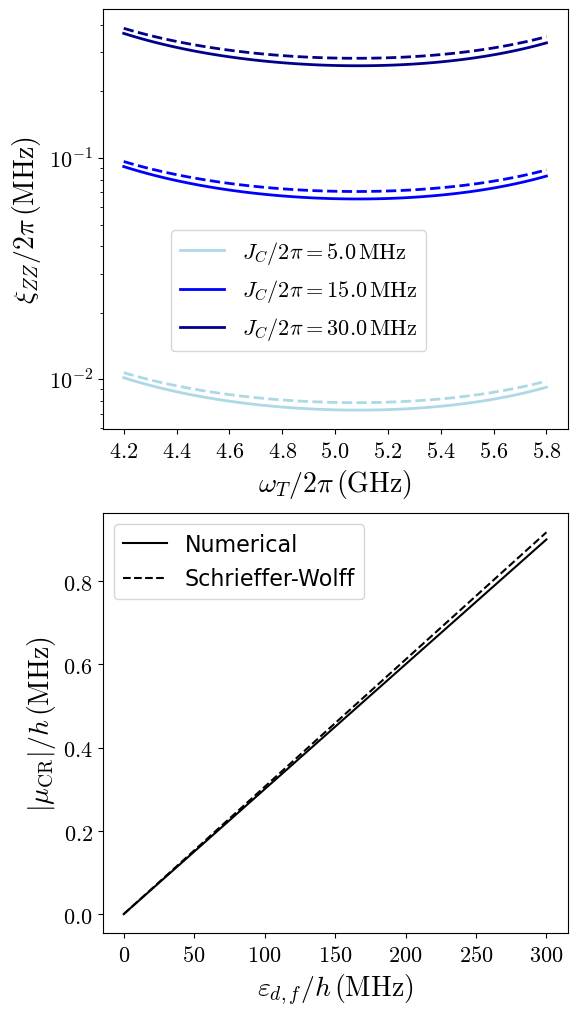

In [61]:
plot_sw_comparison(jc, transm_freq, zz, zz_sw, result_sw_lin, save=True)